# IS THERE A GENDER RELATED PAY GAP - EMPIRICAL ANALYSIS

-----

## Introduction

In this project I will focus on finding out whether or not the salary is affected by gender using the data of the Salary Survey from AskAManager.org.Hopefully the finding of this project will show no gap due employee's gender and if there is any, I will try to explore how dose this affect the salary and build a model that can help female to assess whether they're being paid at/above/below market rate, as well as to get a sense of their standing when asking for a raise.


-------

## Data

The dataset explored in this notebook is AskAManager.org 2021 Salary Survey and it was obtained from this website
https://www.askamanager.org/2021/05/look-at-24000-peoples-real-life-salaries.html

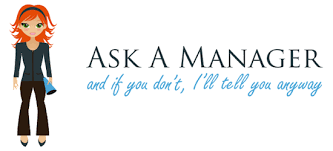

---

## Setup


In [2]:
# imports needed packages

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.linear_model import RidgeCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVR

from xgboost import XGBRegressor

%matplotlib inline


In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

-----

## Data Preparation \ Cleaning
First, Use pandas `read_csv()` to load the data into a dataframe and then call `head()` to make sure everything looks good.

In [4]:
# read in the survey dataset
df=pd.read_csv('Salary_Survey_2021.csv')

# Use head to view the first few rows
df.head()

,Timestamp,How old are you?,Industry,Job title,Additional context on job title,Annual salary,Other monetary comp,Currency,Currency - other,Additional context on income,Country,State,City,Overall years of professional experience,Years of experience in field,Highest level of education completed,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [5]:
# How many rows and columns does the dataset have?
df.shape

(26792, 18)

In the next steps I will **examine my datset further** starting by it's coulmns ,and I will **drop the unrelated coulmns** depending on their data content

In [6]:
# Let's examine the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26792 entries, 0 to 26791
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Timestamp                                 26792 non-null  object 
 1   How old are you?                          26792 non-null  object 
 2   Industry                                  26729 non-null  object 
 3   Job title                                 26792 non-null  object 
 4   Additional context on job title           6915 non-null   object 
 5   Annual salary                             26792 non-null  object 
 6   Other monetary comp                       19857 non-null  float64
 7   Currency                                  26792 non-null  object 
 8   Currency - other                          174 non-null    object 
 9   Additional context on income              2911 non-null   object 
 10  Country                           

In [7]:
# calculate the number of missing data in each column
missing_col = df.isnull().sum()
missing_col

Timestamp                                       0
How old are you?                                0
Industry                                       63
Job title                                       0
Additional context on job title             19877
Annual salary                                   0
Other monetary comp                          6935
Currency                                        0
Currency - other                            26618
Additional context on income                23881
Country                                         0
State                                        4761
City                                           72
Overall years of professional experience        0
Years of experience in field                    0
Highest level of education completed          202
Gender                                        155
Race                                          151
dtype: int64

In [8]:
# calculate the percentage of missing values of each column
missing_percent_col = missing_col/(len(df))*100
missing_percent_col.sort_values(ascending = False, inplace=True)
missing_percent_col.head(15)

Currency - other                            99.350552
Additional context on income                89.134816
Additional context on job title             74.190057
Other monetary comp                         25.884592
State                                       17.770230
Highest level of education completed         0.753956
Gender                                       0.578531
Race                                         0.563601
City                                         0.268737
Industry                                     0.235145
Currency                                     0.000000
How old are you?                             0.000000
Country                                      0.000000
Annual salary                                0.000000
Overall years of professional experience     0.000000
dtype: float64

Depending on the above results and my own understanding for the dataset I have decided to **drop these coulmns** as unrelated data

In [9]:
# dropping un-used data from the dataset 
df.drop(['Timestamp', 'Job title','Additional context on job title','Other monetary comp','Currency - other','Additional context on income','State','City','Race'], axis=1, inplace=True)

In [10]:
# checking the new number of columns
df.shape

(26792, 9)

In [11]:
df.head()

,How old are you?,Industry,Annual salary,Currency,Country,Overall years of professional experience,Years of experience in field,Highest level of education completed,Gender
0,25-34,Education (Higher Education),"55,000",USD,United States,5-7 years,5-7 years,Master's degree,Woman
1,25-34,Computing or Tech,"54,600",GBP,United Kingdom,8 - 10 years,5-7 years,College degree,Non-binary
2,25-34,"Accounting, Banking & Finance","34,000",USD,US,2 - 4 years,2 - 4 years,College degree,Woman
3,25-34,Nonprofits,"62,000",USD,USA,8 - 10 years,5-7 years,College degree,Woman
4,25-34,"Accounting, Banking & Finance","60,000",USD,US,8 - 10 years,5-7 years,College degree,Woman


Next , I will **check the labels of the remaining columns and rename** some of them if it is necessary

In [12]:
# checking the columns's names
df.columns

Index(['How old are you?', 'Industry', 'Annual salary', 'Currency', 'Country',
       'Overall years of professional experience',
       'Years of experience in field', 'Highest level of education completed',
       'Gender'],
      dtype='object')

In [13]:
# replacing some special character columns names with proper names 
df=df.rename(columns = {'How old are you?':'Age',
                       'Annual salary':'Annual_Salary',
                       'Overall years of professional experience':'Overall_Experience',
                       'Years of experience in field':'Field_Experience',
                       'Highest level of education completed':'Education'})

In [14]:
#checking the new names
df.columns

Index(['Age', 'Industry', 'Annual_Salary', 'Currency', 'Country',
       'Overall_Experience', 'Field_Experience', 'Education', 'Gender'],
      dtype='object')


After that, I will **reorder the columns** in my dataset by just moving the dependint variable to the end which makes more sence.

In [15]:
df = df[['Age', 'Industry', 'Currency', 'Country',
       'Overall_Experience', 'Field_Experience', 'Education', 'Gender', 'Annual_Salary']]

In [16]:
df.head(1)

,Age,Industry,Currency,Country,Overall_Experience,Field_Experience,Education,Gender,Annual_Salary
0,25-34,Education (Higher Education),USD,United States,5-7 years,5-7 years,Master's degree,Woman,"55,000"


Here , I will **check the values** in thses columns and **replace any special or unwanted characters** with numerical or meaningful data.

In [17]:
# convert the Annual_Salary column datatype to float
df['Annual_Salary'] = df['Annual_Salary'].str.replace(',','').astype(int)
df['Annual_Salary']

0         55000
1         54600
2         34000
3         62000
4         60000
          ...  
26787     60000
26788    125000
26789     55000
26790     90000
26791     85000
Name: Annual_Salary, Length: 26792, dtype: int32

In [18]:
#checking the Annual_Salary new datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26792 entries, 0 to 26791
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 26792 non-null  object
 1   Industry            26729 non-null  object
 2   Currency            26792 non-null  object
 3   Country             26792 non-null  object
 4   Overall_Experience  26792 non-null  object
 5   Field_Experience    26792 non-null  object
 6   Education           26590 non-null  object
 7   Gender              26637 non-null  object
 8   Annual_Salary       26792 non-null  int32 
dtypes: int32(1), object(8)
memory usage: 1.7+ MB


As we know, Some of the columns' data came from a  **free-form text entry**, which always results in lots of data cleaning to be done.
So in the next cells I will examine those columns and try to **clean them as much as possible**.

In [19]:
# checking the Currency column values
df['Currency'].value_counts()

USD        22342
CAD         1592
GBP         1538
EUR          592
AUD/NZD      481
Other        138
CHF           35
SEK           35
JPY           22
ZAR           13
HKD            4
Name: Currency, dtype: int64

In [20]:
# only keep responses with USD currency in order to avoid currency converting problem
df = df[df.Currency == 'USD']

In [21]:
# checking the Country column values
df['Country'].value_counts()

United States             8573
USA                       7637
US                        2515
United States              624
U.S.                       558
                          ... 
Argentina                    1
The Netherlands              1
Jamaica                      1
USAB                         1
Japan, US Gov position       1
Name: Country, Length: 215, dtype: int64

In [22]:
# removing whitespaces from the string and convert it to uppercase
df.Country = df.Country.str.strip()
df.Country = df.Country.str.upper()

In [23]:
# combining different entries that means USA under one value 
df.loc[(df['Country'] == 'UNITED STATES') | (df['Country'] == 'UNITED STATE') | (df['Country'] == 'UNITES STATES') |(df['Country'] == 'UNITED STATED') | (df['Country'] == 'US') | (df['Country'] == 'U.S.') | 
       (df['Country'] == 'UNITED STATE OF AMERICA') | (df['Country'] == 'U.S.A.') | (df['Country'] == 'U.S.A') | (df['Country'] == 'U.S') | (df['Country'] == 'UNITED STATES OF AMERICA') | (df['Country'] == 'AMERICA') | (df['Country'] == 'U. S.'), 'Country'] = 'USA'

In [24]:
df['Country'].value_counts(ascending=False)

USA               22078
CANADA               17
AUSTRALIA             9
UNITED KINGDOM        7
ISRAEL                7
                  ...  
IS                    1
UNTED STATES          1
UA                    1
COSTA RICA            1
NORWAY                1
Name: Country, Length: 149, dtype: int64

In [25]:
# only keep responses from USA 
df = df[(df.Country == 'USA')]

In [26]:
df['Country'].value_counts(ascending=False)

USA    22078
Name: Country, dtype: int64

Next ,I will **clean the Gender column** as the survey allows other unrlated option to be chosen here libe non-binary and prefer not to answer option.

In [27]:
# checking the Gender column values
df['Gender'].value_counts()

Woman                            17382
Man                               3765
Non-binary                         579
Other or prefer not to answer      222
Prefer not to answer                 1
Name: Gender, dtype: int64

In [28]:
# only keep responses from defined gender respondents
df = df[(df.Gender == 'Woman') | (df.Gender == 'Man')]

In [29]:
df['Gender'].value_counts()

Woman    17382
Man       3765
Name: Gender, dtype: int64

In [30]:
df.head()

,Age,Industry,Currency,Country,Overall_Experience,Field_Experience,Education,Gender,Annual_Salary
0,25-34,Education (Higher Education),USD,USA,5-7 years,5-7 years,Master's degree,Woman,55000
2,25-34,"Accounting, Banking & Finance",USD,USA,2 - 4 years,2 - 4 years,College degree,Woman,34000
3,25-34,Nonprofits,USD,USA,8 - 10 years,5-7 years,College degree,Woman,62000
4,25-34,"Accounting, Banking & Finance",USD,USA,8 - 10 years,5-7 years,College degree,Woman,60000
5,25-34,Education (Higher Education),USD,USA,8 - 10 years,2 - 4 years,Master's degree,Man,62000


Furthermore,the **Industry column** was a question with (other) as an option that allows free-form text entry so I have decided to **keep only well known values** that I can use them in my prediction model 

In [31]:
# keeping only rows that have a value from this list
df = df[df.Industry.isin(['Accounting, Banking & Finance', 'Agriculture or Forestry','Art & Design','Business or Consulting',
                         'Computing or Tech','Education (Primary/Secondary)', 'Education (Higher Education)','Engineering or Manufacturing',
                         'Entertainment','Government and Public Administration','Health care','Hospitality & Events','Insurance','Law','Law Enforcement & Security',
                         'Leisure, Sport & Tourism','Marketing, Advertising & PR','Media & Digital','Nonprofits','Property or Construction',
                         'Recruitment or HR','Retail','Sales','Social Work','Transport or Logistics','Utilities & Telecommunications'])]

In [32]:
# checking how many rows and columns does the dataset have now
df.shape

(19448, 9)

Next, I will check the number of **rows with null values** in any of its columns to handel this.

In [33]:
# checking the number of rows with null values 
len(df) - len(df.dropna())

104

In [34]:
# drop any row has a null value in any columns
df.dropna(how='any',inplace=True)

In [35]:
#check for null values count in each column
df.isnull().sum()

Age                   0
Industry              0
Currency              0
Country               0
Overall_Experience    0
Field_Experience      0
Education             0
Gender                0
Annual_Salary         0
dtype: int64

In [36]:
# checking the final number of rows and columns in the dataset
df.shape

(19344, 9)

In [37]:
#df = df[df.Annual_Salary > 0]

Finally ,One of the important steps in regression models is **looking for outliers** as they have a strong affect on the final result. So I will **use (IQR) and box plot** to check and remove them first in order to finish cleaning my dataset

In [38]:
#describtive stats help understand the column values 
df.describe()

,Annual_Salary
count,1.934400e+04
mean,9.358316e+04
std,7.373215e+04
min,0.000000e+00
25%,5.800000e+04
50%,8.000000e+04
75%,1.150000e+05
max,5.000044e+06


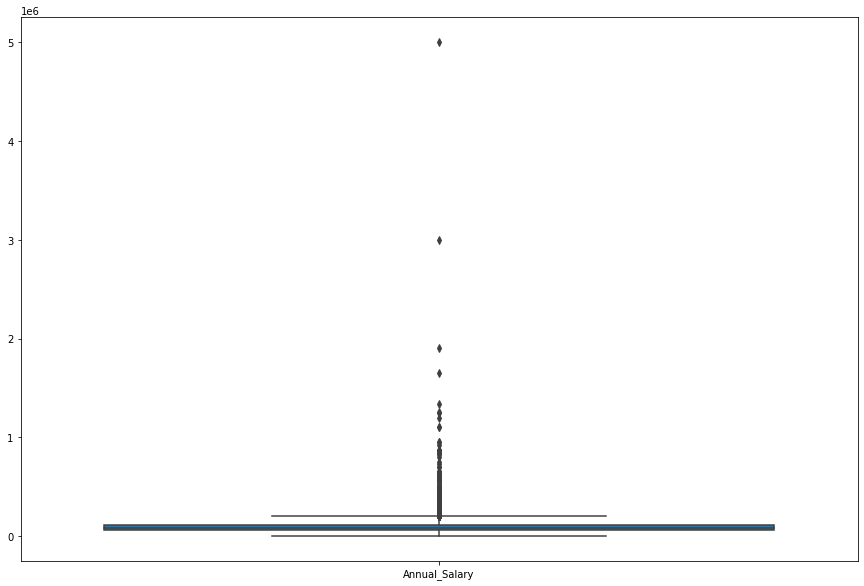

In [39]:
#Visualize the outliers using boxplot
plt.figure (figsize=[15,10])
sns.boxplot(data=df);

 The box plots for The Annual_Salary variable is shown above. **We observe lots of outliers** due to the fact of the free entry nature of the survey .These are user inputs that can introduce alot of mistakes and outliers  .They are considerd unrelated data and I will **remove them**.

In [40]:
#calculation IQR
Q1 = df['Annual_Salary'].quantile(0.25)
Q3 = df['Annual_Salary'].quantile(0.75)
IQR = Q3-Q1
IQR

57000.0

In [41]:
#remove all rows where Anuall salary value is an outlier
df=df[~((df['Annual_Salary'] < (Q1 - 1.5 *IQR)) | (df['Annual_Salary'] > (Q3 + 1.5 *IQR )))]

In [42]:
# check the dataset shape after removing outlier process
df.shape

(18685, 9)

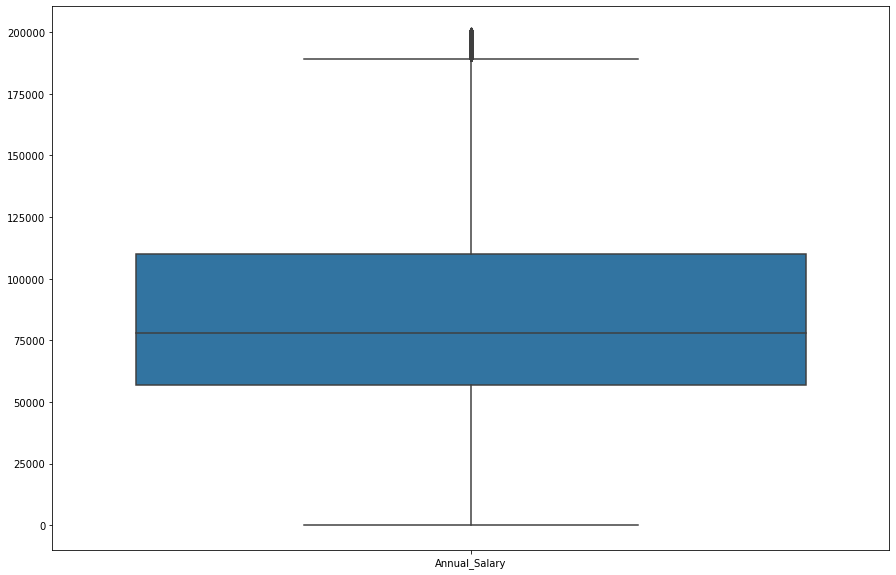

In [43]:
plt.figure (figsize=[15,10])
sns.boxplot(data=df);

In [44]:
df['Annual_Salary'].describe()

count     18685.000000
mean      86267.072679
std       38999.133202
min           0.000000
25%       57000.000000
50%       78000.000000
75%      110000.000000
max      200500.000000
Name: Annual_Salary, dtype: float64

----

## Feature Engineering:

As my final goal is to predict the salary of an employee using these features , Regression Modle requires input data in numerical notations to extract patterns from it and make predictions. But, not all the data provided in my source dataset is numerical. Most of the data provided are Categorical data like Age, Education, Industry, Overall_Experience, Gender, etc. I need to perform Feature Engineering on my data to create meaningful numerical data out of the source dataset.

In [45]:
# check the values and number of values in each column
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())
    print(df[c].nunique())

---- Age ---
25-34         8295
35-44         6747
45-54         2176
18-24          697
55-64          693
65 or over      71
under 18         6
Name: Age, dtype: int64
7
---- Industry ---
Computing or Tech                       3068
Nonprofits                              1955
Education (Higher Education)            1899
Health care                             1418
Government and Public Administration    1320
Accounting, Banking & Finance           1310
Engineering or Manufacturing            1235
Marketing, Advertising & PR              831
Law                                      770
Education (Primary/Secondary)            666
Business or Consulting                   605
Media & Digital                          557
Insurance                                412
Recruitment or HR                        363
Retail                                   336
Property or Construction                 277
Art & Design                             256
Utilities & Telecommunications           240


I decided to do two copies of my dataset one with **Label Encoding** for correlation matrix and features selection purposes and another one with **One Hot Encoding (dummy variables)** for modeling later in Data Modeling section

First , I will create the Label Encoding copy of my dataset using a one trick in pandas that is to **convert a column to a category, then use those category values for your label encoding** in some columns

In [46]:
# create copy of the original dataset
label_df = df.copy()

In [47]:
label_df.head(1)

,Age,Industry,Currency,Country,Overall_Experience,Field_Experience,Education,Gender,Annual_Salary
0,25-34,Education (Higher Education),USD,USA,5-7 years,5-7 years,Master's degree,Woman,55000


In [48]:
# convert the Industry column datatype to a category
label_df['Industry'] = label_df['Industry'].astype('category')
label_df.dtypes

Age                     object
Industry              category
Currency                object
Country                 object
Overall_Experience      object
Field_Experience        object
Education               object
Gender                  object
Annual_Salary            int32
dtype: object

In [49]:
# then use those category values for label encoding
label_df['Industry'] = label_df['Industry'].cat.codes
label_df.head()

,Age,Industry,Currency,Country,Overall_Experience,Field_Experience,Education,Gender,Annual_Salary
0,25-34,5,USD,USA,5-7 years,5-7 years,Master's degree,Woman,55000
2,25-34,0,USD,USA,2 - 4 years,2 - 4 years,College degree,Woman,34000
3,25-34,18,USD,USA,8 - 10 years,5-7 years,College degree,Woman,62000
4,25-34,0,USD,USA,8 - 10 years,5-7 years,College degree,Woman,60000
5,25-34,5,USD,USA,8 - 10 years,2 - 4 years,Master's degree,Man,62000


In [50]:
label_df.dtypes

Age                   object
Industry                int8
Currency              object
Country               object
Overall_Experience    object
Field_Experience      object
Education             object
Gender                object
Annual_Salary          int32
dtype: object

Here I will use the meaning of the column values in puting the codes, so really larger code will mean larger original value.

In [51]:
# mapping Age into numerical data using map function
label_df['Age'] = label_df['Age'].map({'under 18':0, '18-24':1,'25-34':2,'35-44':3,
                        '45-54':4,'55-64':5, '65 or over':6}).astype(int)

In [52]:
# mapping Overall_Experience into numerical data using map function
label_df['Overall_Experience'] = label_df['Overall_Experience'].map({'1 year or less':0 ,'2 - 4 years':1,'5-7 years':2 ,'8 - 10 years':3, '11 - 20 years':4 , '21 - 30 years':5 , '31 - 40 years':6 , '41 years or more':7}).astype(int)

In [53]:
# mapping Field_Experience into numerical data using map function
label_df['Field_Experience'] = label_df['Field_Experience'].map({'1 year or less':0 ,'2 - 4 years':1,'5-7 years':2 ,'8 - 10 years':3, '11 - 20 years':4 , '21 - 30 years':5 , '31 - 40 years':6 , '41 years or more':7}).astype(int)

In [54]:
# mapping Education into numerical data using map function
label_df['Education'] = label_df['Education'].map({'High School':0 ,'Some college':1,'College degree':2 ,"Master's degree":3, 'PhD':4 , 'Professional degree (MD, JD, etc.)':5 }).astype(int)

In [55]:
# mapping Gender into numerical data using map function
label_df['Gender'] = label_df['Gender'].map({'Man': 0, 'Woman': 1}).astype(int)

In [56]:
# checking The final numerical output of the dataset 
label_df.head()

,Age,Industry,Currency,Country,Overall_Experience,Field_Experience,Education,Gender,Annual_Salary
0,2,5,USD,USA,2,2,3,1,55000
2,2,0,USD,USA,1,1,2,1,34000
3,2,18,USD,USA,3,2,2,1,62000
4,2,0,USD,USA,3,2,2,1,60000
5,2,5,USD,USA,3,1,3,0,62000


In [57]:
label_df.shape

(18685, 9)

-----

# Data Exploration \ Visualization

Now , I will do some visualizations of my data in order **to understant it better**.I will try to focuse on the affect of employee's gender in his\her salary.

In [58]:
#plt.figure (figsize=[15,7])
#sns.histplot(df['Annual_Salary'], kde=False, stat='density');

**Q1: Number of respondents across gender? ?**

Text(0, 0.5, 'Gender')

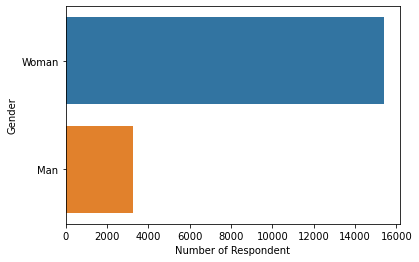

In [59]:
#Show the count of Women and men respondents
sns.countplot(y='Gender',data=df)
plt.xlabel('Number of Respondent')
plt.ylabel('Gender')

**Q2: What is the average salary for each gender ?**

<AxesSubplot:xlabel='Gender'>

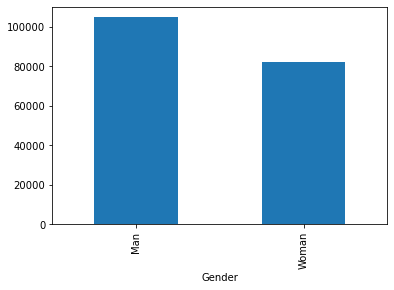

In [60]:
#plotting a bar graph for Gender against Annual Salary to see the co-relation between these columns 
df.groupby('Gender').Annual_Salary.mean().plot(kind='bar')

As we can see, the above gender bar chart provides us some useful insight into the data that **Men are more likely to have a higher income**.

**Q3: How dose each gender salary corrolate with years of experince?**

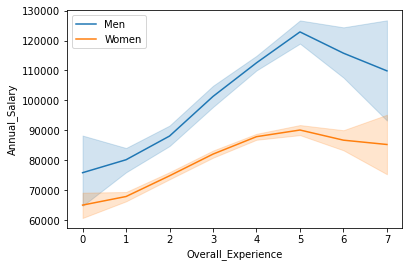

In [61]:
men= label_df[label_df['Gender']==0]
women= label_df[label_df['Gender']==1]
sns.lineplot(x = men["Overall_Experience"] , y = men["Annual_Salary"])
sns.lineplot(x = women["Overall_Experience"] , y = women["Annual_Salary"])
plt.legend(labels=["Men","Women"])

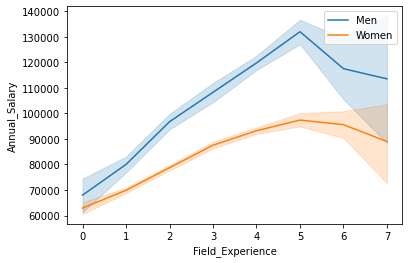

In [62]:
men= label_df[label_df['Gender']==0]
women= label_df[label_df['Gender']==1]
sns.lineplot(x = men["Field_Experience"] , y = men["Annual_Salary"])
sns.lineplot(x = women["Field_Experience"] , y = women["Annual_Salary"])
plt.legend(labels=["Men","Women"])

**Q4: Is there any statical difference in the level of pay by education across gender?**

<AxesSubplot:xlabel='Education', ylabel='count'>

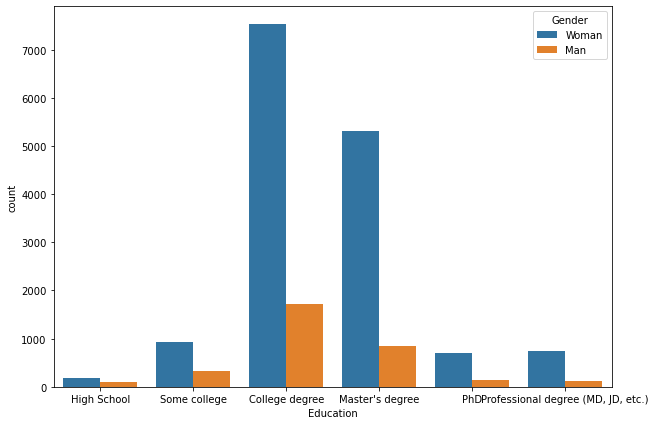

In [63]:
plt.figure (figsize=[10,7])
sns.countplot(x=df['Education'], data= df ,hue="Gender", order=['High School','Some college','College degree',"Master's degree", 'PhD', 'Professional degree (MD, JD, etc.)'])

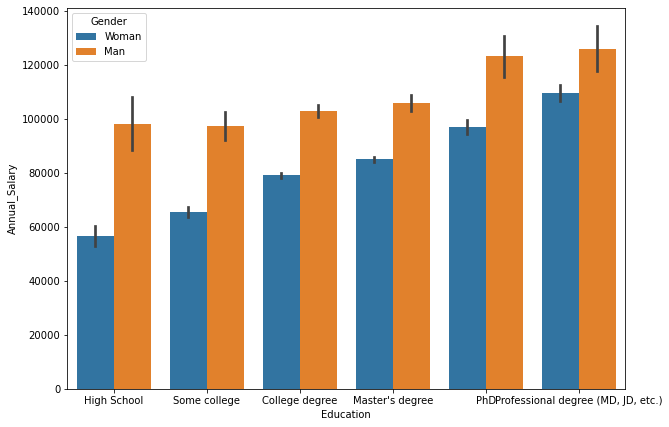

In [64]:
plt.figure (figsize=[10,7])
ax=sns.barplot(x="Education", y="Annual_Salary", hue="Gender", data=df , order=['High School','Some college','College degree',"Master's degree", 'PhD', 'Professional degree (MD, JD, etc.)'])

### Q5: Exploratory Data Analysis

**Pair Plot**

In [65]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18685 entries, 0 to 26791
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 18685 non-null  int32 
 1   Industry            18685 non-null  int8  
 2   Currency            18685 non-null  object
 3   Country             18685 non-null  object
 4   Overall_Experience  18685 non-null  int32 
 5   Field_Experience    18685 non-null  int32 
 6   Education           18685 non-null  int32 
 7   Gender              18685 non-null  int32 
 8   Annual_Salary       18685 non-null  int32 
dtypes: int32(6), int8(1), object(2)
memory usage: 1.4+ MB


C:\Users\basha\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


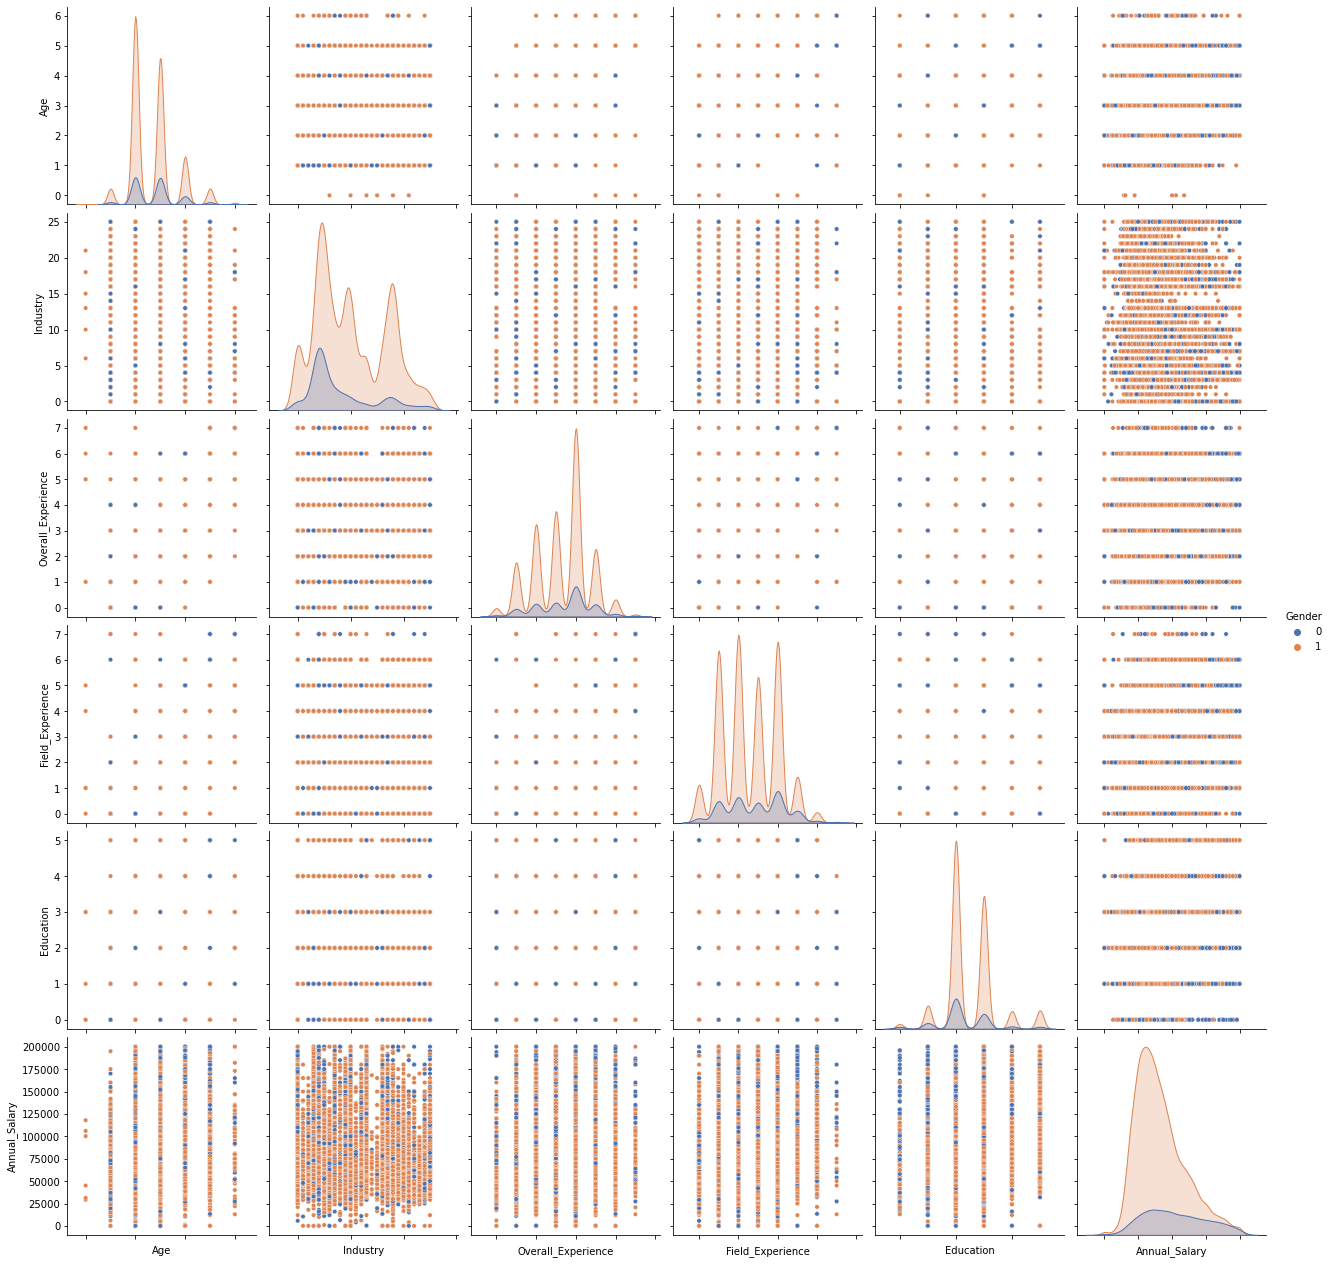

In [66]:
#pair plots of entire dataset
pp = sns.pairplot(label_df, hue = 'Gender', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

**Correlation Heatmap**

In [67]:
# View the correlations
label_df.corr()

,Age,Industry,Overall_Experience,Field_Experience,Education,Gender,Annual_Salary
Age,1.000000,-0.017956,0.769197,0.630280,0.019089,-0.020630,0.151270
Industry,-0.017956,1.000000,0.000680,-0.025749,-0.025686,0.112125,-0.183830
Overall_Experience,0.769197,0.000680,1.000000,0.749241,-0.039603,-0.031560,0.213222
Field_Experience,0.630280,-0.025749,0.749241,1.000000,0.004660,-0.072879,0.304712
Education,0.019089,-0.025686,-0.039603,0.004660,1.000000,0.087315,0.188213
Gender,-0.020630,0.112125,-0.031560,-0.072879,0.087315,1.000000,-0.218425
Annual_Salary,0.151270,-0.183830,0.213222,0.304712,0.188213,-0.218425,1.000000


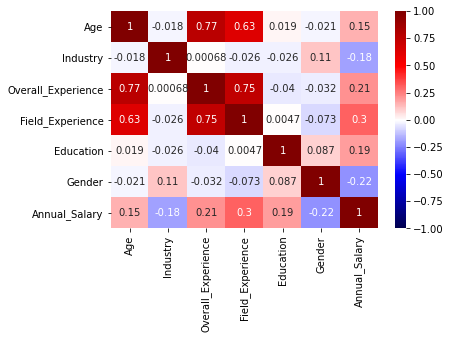

In [68]:
# use the heatmap function from seaborn to plot the correlation matrix
sns.heatmap(label_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);
    

As we can see from the above plots ,a value of < 0.3 shows there is a positive\negitive correlation between two variables, but it is **weak and likely unimportant**.
A correlation of 0.0 shows no linear relationship between the movement of the two variables. Values at or close to zero imply a weak or no linear relationship.Correlation coefficient values less than +0.8 or greater than -0.8 are not considered significant.**So this may tell us that we have to use a non-linear model in our prediction**

-----

# Data Modeling

I will start first by creating my **Second encoded dataset** that will be used in the regression models . I will use sklearn get.dummies method in order to transform all the categorical features in the original dataset using dummy variables so sklearn will be able to understand them.

In [75]:
#apply it to the whole df
dummy_df = pd.get_dummies(df, drop_first=True) 
dummy_df.head()

,Annual_Salary,Age_25-34,Age_35-44,Age_45-54,Age_55-64,Age_65 or over,Age_under 18,Industry_Agriculture or Forestry,Industry_Art & Design,Industry_Business or Consulting,...,Field_Experience_31 - 40 years,Field_Experience_41 years or more,Field_Experience_5-7 years,Field_Experience_8 - 10 years,Education_High School,Education_Master's degree,Education_PhD,"Education_Professional degree (MD, JD, etc.)",Education_Some college,Gender_Woman
0,55000,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,34000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,62000,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,60000,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,62000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


After that , I will break the data into 2 portions: 80% for a cross-validated training process, and 20% for final testing evaluation. 

In [77]:
X, y = dummy_df.drop(['Annual_Salary'],axis=1), dummy_df['Annual_Salary']
#X, y = label_df.drop(['Annual_Salary','Currency','Country'],axis=1), label_df['Annual_Salary']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [78]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

As I saw through the above analysis , mostly I need non-linear models to predict the salary.Although the low corrleations may mean poor data according to it's catogrical nature that needed to be encoded , so I decided to try two of the linear models to eleminate this option.

**Feature Scaling**

In [109]:
#Feature scaling for train, val, and test so that we can run our models on each
Sc_X = StandardScaler()
Sc_y = StandardScaler()

X_train_scaled = Sc_X.fit_transform(X_train.values)
#y_train_scaled = Sc_y.fit_transform([y_train.values]).reshape(1,-1)

X_val_scaled = Sc_X.transform(X_val.values)
#y_val_scaled = Sc_y.transform([y_train.values]).reshape(1,-1)

X_test_scaled = Sc_X.transform(X_test.values)
#y_test_scaled = Sc_y.transform([y_train.values]).reshape(1,-1)

**Simple Train / Validation / Test**

In [113]:
#set up the 6 models we're choosing from:

#Simple Linear Regression model
lm = LinearRegression()

#Ridge Model
lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)
lm_poly = LinearRegression()


# xgboost model
xgb_model = XGBRegressor()

# Random Forest model
rf_model= RandomForestRegressor(random_state=33)

# SVR model
svr_model = SVR(kernel = 'rbf')


In [115]:
##### validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 Polynomial Regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

xgb_model.fit(X_train_scaled, y_train)
xgb_r2 = xgb_model.score(X_val_scaled, y_val)
print("XGBoost val R^2 Score: {:.3f}".format(xgb_r2))

rf_model.fit(X_train_scaled, y_train)
r_squared = rf_model.score(X_val_scaled, y_val)
print("Random Forest val R^2 Score: " + str(r_squared))


svr_model.fit(X_train_scaled, y_train)
print(f'SV Regression val R^2: {svr_model.score(X_val_scaled, y_val):.3f}')

Linear Regression val R^2: 0.377
Ridge Regression val R^2: 0.377
Degree 2 Polynomial Regression val R^2: -724058162362258685952.000
XGBoost val R^2 Score: 0.347
Random Forest val R^2 Score: 0.28595701491957093
SV Regression val R^2: -0.037


In [116]:
#Test

lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

lm_reg.fit(X,y)
print(f'Ridge Regression test R^2: {lm_reg.score(X_test, y_test):.3f}')

lm_poly.fit(X,y)
print(f'Degree 2 polynomial Regression test R^2: {lm_poly.score(X_test, y_test):.3f}')

xgb_model.fit(X,y)
print(f'xgb Regression test R^2: {xgb_model.score(X_test, y_test):.3f}')

rf_model.fit(X,y)
print(f'RandomForest Regression test R^2: {rf_model.score(X_test, y_test):.3f}')

svr_model.fit(X,y)
print(f'SV Regression test R^2: {svr_model.score(X_test, y_test):.3f}')

Linear Regression test R^2: 0.376
Ridge Regression test R^2: 0.376
Degree 2 polynomial Regression test R^2: 0.376
xgb Regression test R^2: 0.365
RandomForest Regression test R^2: 0.314
SV Regression test R^2: -0.049


**Cross-Validation / Test**

In [117]:
X, y = np.array(X), np.array(y)#this helps with the way kf will generate indices below

kf = KFold(n_splits=5, shuffle=True, random_state = 3)


print(f'Linear Regression val R^2: {(np.mean(cross_val_score(lm, X, y, cv=kf, scoring="r2"))):.3f}')

print(f'Ridge Regression val R^2: {(np.mean(cross_val_score(lm_reg, X, y, cv=kf, scoring="r2"))):.3f}')

print(f'Degree 2 polynomial regression val R^2: {(np.mean(cross_val_score(lm_poly, X, y, cv=kf, scoring="r2"))):.3f}')

print(f'XGBoost val R^2 Score: {(np.mean(cross_val_score(xgb_model, X, y, cv=kf, scoring="r2"))):.3f}')

print(f'RandomForest val R^2 Score: {(np.mean(cross_val_score(rf_model, X, y, cv=kf, scoring="r2"))):.3f}')

print(f'SVR val R^2 Score: {(np.mean(cross_val_score(svr_model, X, y, cv=kf, scoring="r2"))):.3f}')

Linear Regression val R^2: 0.370
Ridge Regression val R^2: 0.370
Degree 2 polynomial regression val R^2: 0.370
XGBoost val R^2 Score: 0.347
RandomForest val R^2 Score: 0.289
SVR val R^2 Score: -0.040


In [118]:
rf = RandomForestRegressor(n_estimators = 200, max_depth=26, 
random_state=33)
rf.fit(X_train_scaled, y_train);
print(rf.feature_importances_)
print(rf.score(X_train_scaled, y_train))

[2.31083949e-02 2.65271008e-02 1.75990262e-02 1.14249069e-02
 2.88874560e-03 9.61302978e-05 2.01535476e-03 3.41351268e-03
 2.37656586e-02 2.14996699e-01 2.18794836e-02 1.64429584e-02
 2.46963877e-02 6.54130029e-03 1.01679231e-02 1.54549869e-02
 6.11182175e-03 6.30477047e-03 9.35878471e-03 9.64174046e-04
 1.66013589e-03 1.26725009e-02 8.88585164e-03 1.45309034e-02
 4.50873741e-03 4.60889629e-03 8.17943138e-03 5.95250297e-03
 7.07348052e-03 3.65148800e-03 7.43138976e-03 2.33289846e-02
 1.97092266e-02 1.77046050e-02 8.09056160e-03 2.58492648e-03
 1.56030973e-02 1.63296743e-02 2.37856554e-02 7.52551912e-02
 2.11523978e-02 9.99571775e-03 5.39655542e-04 2.59411710e-02
 1.84652258e-02 1.20066919e-02 3.60735127e-02 3.15216240e-02
 5.03864273e-02 2.52797516e-02 4.33324631e-02]
0.5509328701610781


AS we can see from the above result , Random Forest Regressor with hyperparamter is the most promosimg model so I tried to improve its result by hyperparameter tuning

**Hyperparameter Tuning**

In [ ]:
param_grid = { 
            "n_estimators"      : [200,250,300,350,400,450,500],
            "max_depth": range(20,40),
            }

grid = GridSearchCV(rf, param_grid, cv=10, scoring="r2")

In [ ]:
grid.fit(X_train_scaled, y_train);

In [ ]:
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

**Evaluation**

Looking at the results above we see that **the R<sup>2</sup> values are very low**  and hence we cannot use any of these models to predict the salary as they will give very not accurate values.So I colud not predict the salary of male and femal employees with exactly the same qualification and features except the gendr .

-----

# Conclusion

The initial analysis of ask the manager salary survey dataset shows a **clear pay gap between male and female employees**.This is a clear indication of the gender discrimination that happened in most of the work environments . Unfortunately , the modeling part could not accomplish what required and keep shwoing a very low accuracy and that can be because of the nature of the data itself (very messy data) . The next steps can be:
* Tune the hyperparamter more
* More Feature Engineering 
* Addition of more features(questions in the survey) in the future to improve the performance of the prediction models
*Study the effect of other factors like race and age

##### Thank You !